In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy import interpolate

In [ ]:
conv25 = np.genfromtxt('convolucion2_5nsconlasr.txt')
conv5 = np.genfromtxt('convo5nslaser.txt')
gate25 = np.genfromtxt('curva2_5ns81ps.txt')
gate5 = np.genfromtxt('curva5ns81ps.txt')

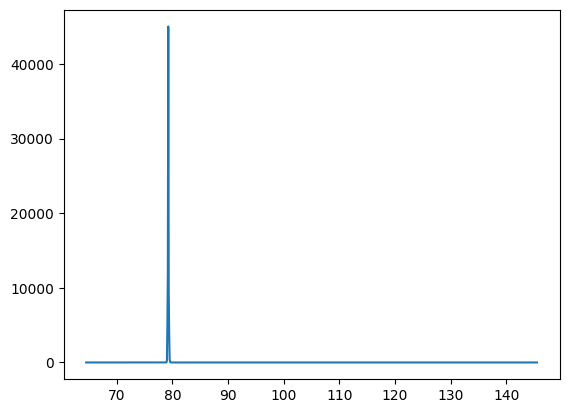

In [ ]:
gate25[:,0] = gate25[:,0]*1e9
plt.plot(gate25[:,0], gate25[:,2])
plt.show()

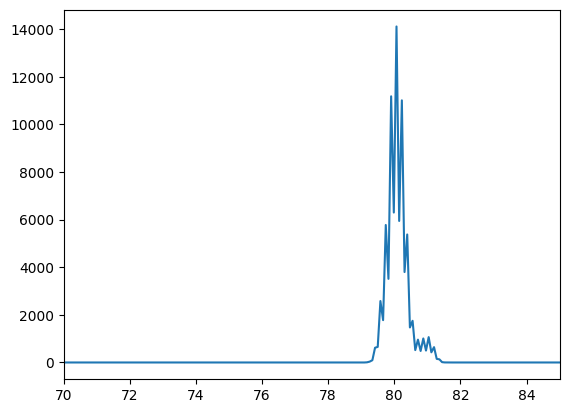

In [ ]:
#gate5[:,0] = gate5[:,0]*1e9
plt.plot(gate5[:,0], gate5[:,2])
plt.xlim([70, 85])
plt.show()

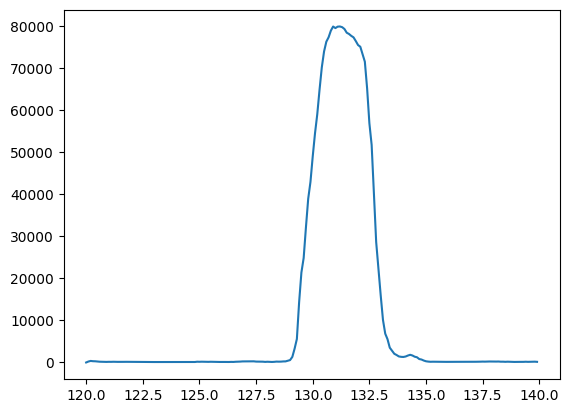

In [ ]:
plt.plot(conv25[:,0], conv25[:,1])
plt.show()

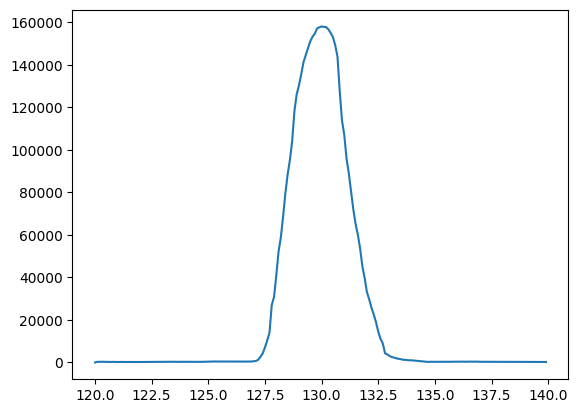

In [ ]:
plt.plot(conv5[:,0], conv5[:,1])
plt.show()

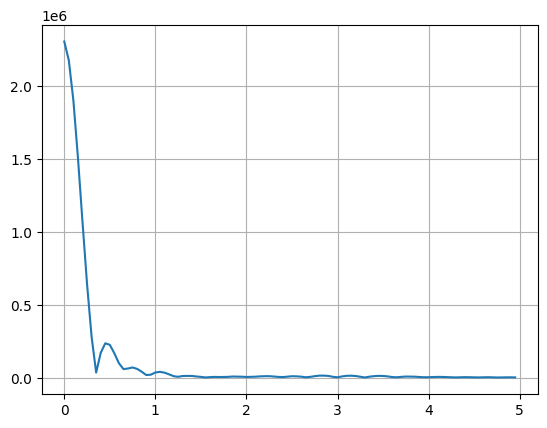

In [ ]:
N = len(conv25[:,1]) # Sampling number
T = 0.1
yf_conv25 = fft(conv25[:,1])
xf_conv25 = fftfreq(N, T)[:N//2]
plt.plot(xf_conv25, np.abs(yf_conv25[0:N//2]))
plt.grid()
plt.show()

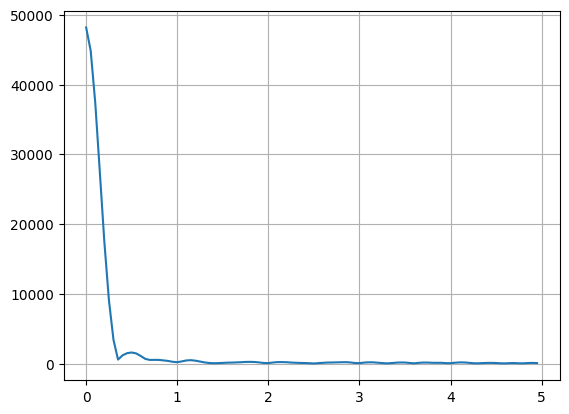

In [ ]:
N = len(conv5[:,1]) # Sample
T = 0.1
yf_conv5 = fft(conv5[:,1])
xf_conv5 = fftfreq(N, T)[:N//2]
plt.plot(xf_conv5, 2.0/N * np.abs(yf_conv5[0:N//2]))
plt.grid()
plt.show()

In [ ]:
gate5 = gate5[400:600,:]
f = interpolate.interp1d(gate5[:,0], gate5[:,2])
gate5[:,0] = np.arange(70, 90, 0.1)
gate5[:,2] = f(gate5[:,0])   # use interpolation function returned by `interp1d`
plt.plot(gate5[:,0], gate5[:,2])
plt.show()

ValueError: A value (70.0) in x_new is below the interpolation range's minimum value (96.932432).

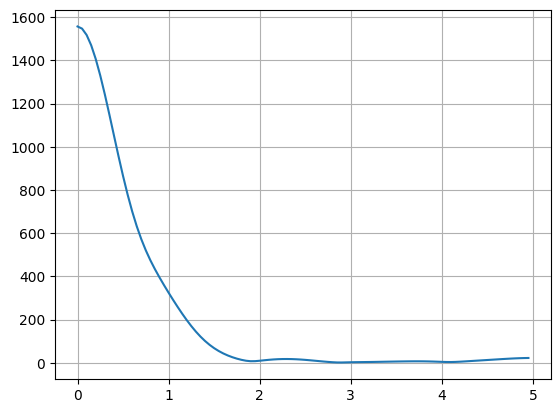

In [ ]:
N = len(gate5[:,2]) # Sample
T = 0.1
yf_gate5 = fft(gate5[:,2])
xf_gate5 = fftfreq(N, T)[:N//2]
plt.plot(xf_gate5, 2.0/N * np.abs(yf_gate5[0:N//2]))
plt.grid()
plt.show()

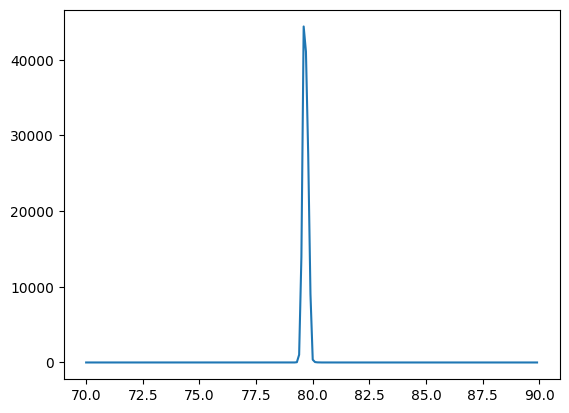

In [ ]:
gate25 = gate25[400:600,:]
f = interpolate.interp1d(gate25[:,0], gate25[:,2])
gate25[:,0] = np.arange(70, 90, 0.1)
gate25[:,2] = f(gate25[:,0])   # use interpolation function returned by `interp1d`
plt.plot(gate25[:,0], gate25[:,2])
plt.show()

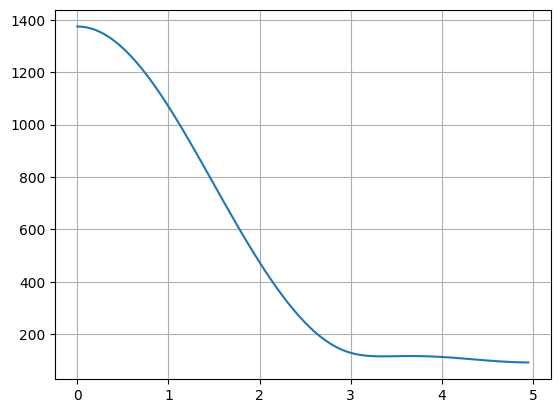

In [ ]:
N = len(gate25[:,2]) # Sample
T = 0.1
yf_gate25 = fft(gate25[:,2])
xf_gate25 = fftfreq(N, T)[:N//2]
plt.plot(xf_gate25, 2.0/N * np.abs(yf_gate25[0:N//2]))
plt.grid()
plt.show()

In [ ]:
yf_laser5 = yf_conv5 / yf_gate5
yf_laser25 = yf_conv25 / yf_gate25
yf_laser25[30:N]=0
yf_laser5[30:N]=0

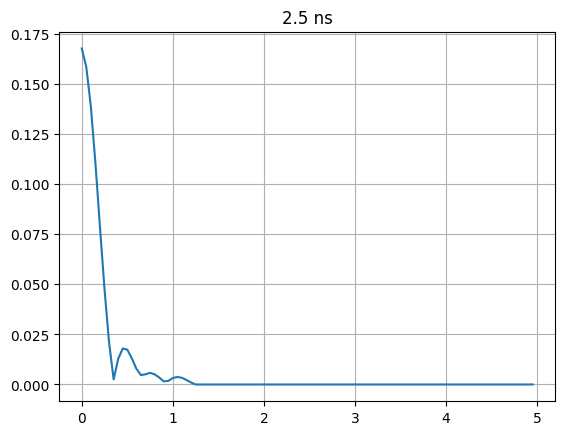

In [ ]:
plt.plot(xf_gate25, 2.0/N * np.abs(yf_laser25[0:N//2]))
plt.grid()
plt.title('2.5 ns')
plt.savefig('cociente2.5ns.png')
plt.show()

In [ ]:
laser5 = ifft(yf_laser5[0:100])
laser25 = ifft(yf_laser25[0:100])

In [ ]:
laser5 = np.abs(laser5)
laser25 = np.abs(laser25)

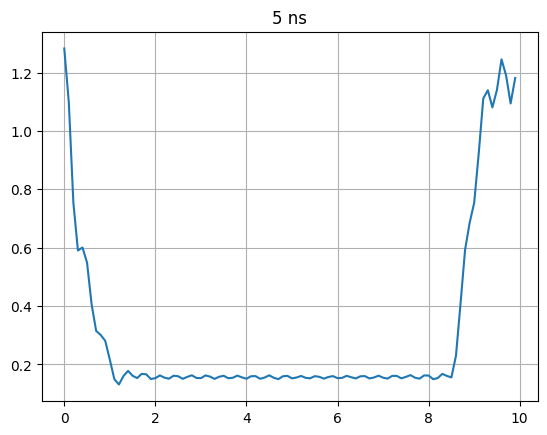

In [ ]:
x_laser5 = np.arange(0,10,0.1)
plt.plot(x_laser5, laser5)
plt.grid()
plt.title('5 ns')
plt.savefig('laser5ns.png')
plt.show()

C:\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


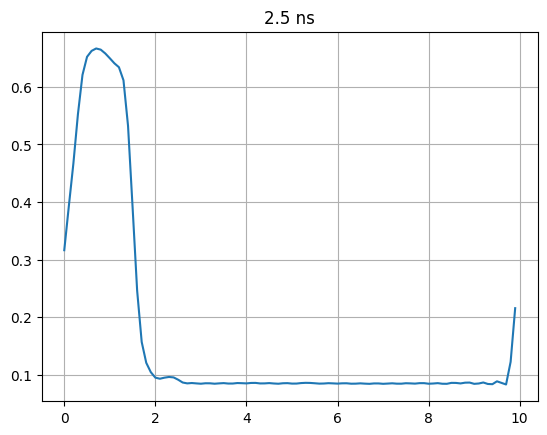

In [ ]:
x_laser25 = np.arange(0,10,0.1)
plt.plot(x_laser25, laser25)
plt.grid()
plt.title('2.5 ns')
plt.savefig('laser2_5ns.png')
plt.show()